# Assignment Name: Tasks 2020 
***
## Course: Machine Learning and Statistics

* Student Name: Paul Caulfield
* Student No: G00376342

* Lecturer: Ian McLoughlin

An assignment submitted in part fulfilment of the requirements of the Higher Diploma in Science - Data Analytics: 2020-2021, Galway Mayo Institute of Technology.
  * Submitted: 18th December 2020

## Introduction
The assessment consistes of four separate tasks. The jupyter notebook contains 4 sections, each section details one of the four tasks which make up the assessment. Below is a brief outline of each of the tasks:

* Task 1: I calculate the square root of 2 to 100 decimal places without using any modules from the standard python library or other external library. I outline research conducted in order to develop my algorithm.

* Task 2: Using scipy.stats package, I verify the value of the Chi-squared Test published in a Wikipedia article and determine whether the the two categorical variables are independent. 

* Task 3: Analysis of standard deviation functions used in Excel. I explain which function gives a better estimate for the standard deviation of a population when performed on a sample.
  
* Task 4: I apply k-means clustering to predict flower species in the Iris Data Set using scikit-learn. 


## Task 1. Calculate the Square Root of 2 Without Using Any Python Modules
***

### 1.1 Task Summary
The objective of this task is to write a Python function called *sqrt2* that calculates and prints to the screen the square root of 2 to 100 decimal places. The function should not depend on any module from the standard python library or other external library. 

### 1.2 The Square Root of 2

The square root of 2, expressed as √2, is the positive number that, when multiplied by itself, equals 2 (Wikipedia). Square roots have two roots, one positive and one negative.  The positive root is referred to as the principal square root of 2, so it is not confused with the negative number which is also the square root of 2.

Wikipedia states that the square root of 2 is an irrational number. An irrational number, is a number that cannot be expressed as the ratio of two integers. All square roots of natural numbers, other than of perfect squares, are irrational. Perfect squares are the squares of the whole numbers, for example: 1, 4, 9, 16, 25, 36, 49, 64, 81, 100 (Math.com, 2000-2005).

The square root of 2 is an irrational number, but it can be expressed as a decimal number. However, there is an infinite number  digits needed to represent the √2 exactly. For this reason, it is common for irrational numbers such as  √2 to be represented as an approximation. Wikipedia states that (≈ 1.4142857) is often used as a good approximation for √2 (Wikipedia).
 

### 1.3 Algorithms for Computing the Square Root of 2

There is no algorithm that can calculate the √2 exactly, as it is an irrational number with an infinite decimal expansion. As a result, the decimal expansion of √2 can only be computed to a finite-precision approximation. In this task, I will attempt to compute the 100 decimal places using the Babylonian method also known as Newton's Method


### 1.4 Newton's Method

Wikipedia states that Newton's method is the most commonly used algorithm for approximating √2. The method is also known as the Babylonian square-root algorithm or Hero's method. Its origins date back to the Babylonians (c1500 BC). Newton's method, otherwise known as the Newton–Raphson method, is named after Isaac Newton and Joseph Raphson, is an interative algorithm which produces consecutively better approximations to of square roots of natural numbers, other than of perfect squares. 

![newtons method](images/Newtons.png)


The following steps are used to find the square root of a positive number S: (Wiklin, 2016):

1. Make an initial estimate, pick a positive number x0.
1. Improve the estimate by applying the formula: 
    * x1 = (x0 + S / x0) / 2. 
        * x1 is a better approximation to sqrt(S).
1. Repeat the above steps until the required decimal expansion converges using the formula:
    * xn+1 = (xn + S / xn) / 2 
        * Convergence happed when the digits of xn+1 and xn agree.

Below is an example of the algorithm adapted from [math.com] showing 10 decimal places which converges after 8 steps.

* Step 1: 1. Make an initial guess, to do this first find the two perfect square numbers it lies between.
    * 1.4 squared =  1.96 
    * 1.5 squared = 2.25
    * Therefore the √2 lies between 1.4 and 1.5, so use 1.4 as initial estimate			
			
* Step 2. Divide 2 by 1.4	=		                1.4285714286 (a)
			
* Step 3. Average 1.4 and 1.4828571 (a) = 		1.4142857143 (b)
			
* Step 4. Divide 2 by 1.4142857143 (b)  =			1.4141414141 (c)
			
* Step 5. Average (b) and (c)           =         1.4142135642 (d)
			
* Step 6. Divide 2 by (d):  			  =         1.4142135605 (e)
			
* Step 7. Average (d) and (e)			  =         1.4142135624 (f)
			
* Step 8. Divide 2 by (f)   			  =         1.4142135624 (g)
			
* Step 9. Average (f) and (g)           =         1.4142135624 


### 1.5  SQRT2 Using Newtons Method
My first attempt shown below, applied the Newton's method outlined above. While I was able to format the result to 100 decimal places the precision of the answer is not what I was expecting due to a common issue with floating point arithmetic, call representation error.  

In [1]:
# Python Function to calculate the square root of 2, adapted from https://www.openbookproject.net/thinkcs/python/english2e/ch06.html

def sqrt(x0):
    # declare variables
    S = float(2) # s = number 2, converted into a float 
    x0 = float(x0) # initial estimate, converted into a float         
    approx = x0
    # Improve the estimate by applying the formula x1 = (x0 + S / x0) / 2. 
    better = (approx + S/approx)/2.0
    # Repeat the above steps until the required decimal expansion converges: using (xn+1 = (xn + S / xn) / 2) formula
    while better != approx:
        approx = better
        better = (approx + S/approx)/2.0
        result = format(approx, '.100f') # convert result to a string with 100 decimal places
    return result
    
    
# Call SQRT Function and pass initial estimate     
sqrt(1.4)

'1.4142135623730949234300169337075203657150268554687500000000000000000000000000000000000000000000000000'

#### 1.6 Representation Error

The Python Software Foundation states that representation error occurs when "decimal fractions cannot be represented exactly as binary (base 2) fractions". As a result, packages such as Python are unable to display the exact decimal expansion. Instead Python will display a decimal approximation to the true decimal value of the binary approximation stored by the machine. Floats are usually approximated "using a binary fraction with the numerator using the first 53 bits starting with the most significant bit and with the denominator as a power of two". This is a standard called IEEE-754 floating point arithmetic, Python floats conform to IEEE-754 “double precision” standard. There are some modules in the Python Standard library and stats packages available such as the Decimal Package which get around this limitation. As I am unable to use any of these modules, my research led to the Big Integer Technique, which I outline below.

###  1.7 SQRT2 Using Big Integer Technique
I used the following method to overcome the representation error encountered above. Cross (2019) demonstrates how it is possible to make use Python’s built-in support for big integers to represent high-precision real numbers. He calculated a million digits of Pi, by converting Pi into a big integer, this is possible because unlike floating point numbers, there is no restrictions to the size or precision of integers in Python. 

To convert a float to a big integer you raise the float to a higher power e.g. to get 100 digitsd in decimal expansion, multiply float by 10 raised to power of 2 x 100 (# of digits precision required).  Cross explains the use of Python’s // operator to perform integer division, otherwise you end up with a floating point result whioch is subject to representation error, as seen earlier.


In [2]:
# Python Function to calculate the square root of 2 using big integer techique
# function adapted from https://stackoverflow.com/a/5189881

# Function to the big integer square root of s after multiplying by 10 raised to the 2 x digits.
def sqrt2(s, digits):
    # declare variables
    s = s * (10**(2*digits)) # s = number 2, multiplied by 10 raised to the 2 x digits
    approx = 0
    better = 1 * (10**digits) # initial estimate
    # Improve the estimate by applying the formula x1 = (x0 + S / x0) / 2. 
    while better != approx:
        approx = better
        # Repeat the above steps until the required decimal expansion converges: using (xn+1 = (xn + S / xn) / 2) formula
        #use Python’s // operator to perform integer division (Cross, 2019)
        better = (approx + (s // approx)) //2
    # format result as a string adapted from https://stackoverflow.com/a/64278569    
    print(f'The Square Root of 2 = {better // 10**100}.{better % 10**100:0100d}')
    
# find the square root of 2, to 100 digits
sqrt2(2, 100)

The Square Root of 2 = 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


### 1.8 SQRT2 Using Decimal Module
I decided to verify the above answer using the python decimal module. The result of which is shown below. The result confirms the same result I got from sqrt2 function above (see 1.7 SQRT2 Using Big Integer Technique). 

In [3]:
# Python Function to calculate the square root of 2 using decimal module
from decimal import *

def sqrtv2(x0): 
    getcontext().prec = 101
    # Change the precision to 100 decimal places: Adapted from https://docs.python.org/3/library/decimal.html
    getcontext().rounding = ROUND_DOWN
    # Round down the calculation when displaying 100 decimal places.
    s = Decimal(2)
    x = Decimal(x0) # initial guess
    approx = x
    # Improve the guess. Apply the formula x1 = (x0 + S / x0) / 2. The number x1 is a better approximation to sqrt(S).
    better = (approx + s / approx) / 2
    # Repeat the above steps until the required decimal expansion converges: using (xn+1 = (xn + S / xn) / 2) formula
    while better != approx:
        approx = better           
        better = (approx + s / approx ) / 2       
         
    
    print("The Square Root of 2 =", approx)

sqrtv2(1.4)

The Square Root of 2 = 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


## Task 2 - Chi-squared 
***

In this task, I used scipy.stats package to verify the value of the Chi-squared Test found in the Wikipedia article [11]. The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the below table as an example [11], stating the Chi-squared value based on it is approximately 24.6 . 

Occupation   | A | B | C | D | Total
-------------|---|---|---|---|------
White collar | 90| 60|104| 95|	349 
Blue collar	 | 30| 50| 51| 20|	151
No collar	 | 30| 40| 45| 35|	150
-------------|---|---|---|---|------
Total	     |150|150|200|150|	650

Brownlee (2019) states that it is common for machine learning to be used to solve classification problems, to determine whether the output variable is dependent or independent of the input variables which are also categorical. If the output variable is found to be independent, then the input variable may removed from the dataset as it is irrelevant to the problem.

Pearson’s Chi-Squared Test is commonly used to test pairs of categorical variables for independence. 

### 2.1 Pearson’s Chi-Squared Test
The Pearson’s Chi-Squared test, is named after Karl Pearson. Wikipedia describes the Chi-Squared test as a "statistical hypothesis test used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table". 

A contingency table is a summary of the collected observations, with the columns representing one variable and the rows representing another variable. The count or frequency of observations is recorded in the cells. The output of the test is a statistic, which can be used to determine whether to accept or reject or null hypothesis (H0) that the observed and expected frequencies are the same (Brownlee, 2019).

The chi-squared statistic is calculated with the following formula (Hamel, 2018):

![statistic](images/chi-squared.png)

* *observed is the actual observed count for each category* 
* *expected is the expected count based on the distribution of the population for the corresponding category* 

The statistics is usally interpreted as follows (Brownlee 2018):

* If statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
* If statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

### 2.2 Example of Chi-Squared Test (Wikipedia)
The Wikipedia article [11], cites the following example: "Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification." The data is represented in the continency table below:

Occupation   | A | B | C | D | Total
-------------|---|---|---|---|------
White collar | 90| 60|104| 95|	349 
Blue collar	 | 30| 50| 51| 20|	151
No collar	 | 30| 40| 45| 35|	150
-------------|---|---|---|---|------
Total	     |150|150|200|150|	650

The Wikipedia article states that the Chi-squared test statistic is approximately 24.6. In the section 2.3 I will use the scipy.stats package to verify the value of this Chi-squared test statistic.

### 2.3 Calculate Chi-Squared Test Statistic and *p* Value

In [4]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats

In [5]:
# Step 2: Create Contingency Table (Adapted from Hamel , 2018)

# create a 2 dimensional table from numpy array insterted into a pandas datafrome
df2 = pd.DataFrame(np.array([[90, 60, 104, 95, 349 ],[30, 50, 51, 20, 151],[30, 40, 45, 35, 150],[150, 150, 200, 150, 650]]),
                   columns=['A', 'B', 'C','D', 'row_totals'],index=['White Collar','Blue Collar','No Collar', 'col_totals'])

observed = df2.iloc[0:3,0:4]   # Get table without totals for later use
df2

,A,B,C,D,row_totals
White Collar,90,60,104,95,349
Blue Collar,30,50,51,20,151
No Collar,30,40,45,35,150
col_totals,150,150,200,150,650


In [6]:
# Step 3: Create Expected Table (Adapted from Hamel , 2018)
# expected is the expected count based on the distribution of the population for the corresponding category

# to calculate the expected counts for a cell - two steps
# 1st: multiply the row total for cell by the column total for cell
# 2nd: divide by the total number of observations (650)


# get the row & column totals, apply np.outer() function to compute the outer product, then divide by the number of observations:
expected =  np.outer(df2["row_totals"][0:3], df2.loc["col_totals"][0:4]) / 650
# Place expected counts of each cell in a 2-dimensional table called expected using a pandas dataframe
expected = pd.DataFrame(expected)
# label columns and rows of table
expected.columns = ['A', 'B', 'C','D']
expected.index = ['White Collar','Blue Collar','No Collar']
# Display expected table
expected

,A,B,C,D
White Collar,80.538462,80.538462,107.384615,80.538462
Blue Collar,34.846154,34.846154,46.461538,34.846154
No Collar,34.615385,34.615385,46.153846,34.615385


In [7]:
# Step 4: calculate the chi-square statistic 


chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
# call .sum() twice: once to get the column sums and a second time to add the column sums together, 
# returns the sum of the entire 2D table.
# Display statistic to 1 place decimals
print(f' Statistic is: {chi_squared_stat:.1f}')

 Statistic is: 24.6


In [9]:
# Step 5: calculate the critical value using scipy.stats

# Calculate degrees of freedom (df): as follows 4x3 table so df = 3x2 = 6.

# Use scipy.stats ppf function to calculate critical value, by passing confidence level q and degrees of freedom (df)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # *
# Display critical value to 2 places decimals
print(f'Critical value is : {crit:.2f}')

Critical value is : 12.59


In [10]:
# Step 6: Interpret Critical Value adapted from Brownlee 2018

if abs(chi_squared_stat) >= crit:
	print('Dependent (reject H0)') # statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
else:
	print('Independent (fail to reject H0)') # statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

Dependent (reject H0)


In [11]:
# Step 7: calculate the p value using scipy.stats

# use scipy.stats cdf function to calculate p-value, statistic and degrees of freedom (df)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=6)
print(f'P value is : {p_value}')

P value is : 0.0004098425861096544


In [12]:
# Step 8: Interpret p Value adapted from Brownlee 2018
probability = 0.95 # 95% confidence
alpha = 1.0 - probability
if p_value <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


### 2.4 Verify Chi-Squared Test Statistic

The chi-squared statistic which I calculated in step 4 was 24.6 this agrees with the chi-squared statistic published in the Wikipedia article.

**Given the chi-squared stat and the high p-value, the test result does not detect a significant relationship between the variables.**


## Task 3 - Analysis of Standard Deviation Functions used in Excel
***

The purpose of this task is to research excel standard deviation functions and explain which function gives a better estimate for the standard deviation of a population when performed on a sample.
  1. In the first part of this task, I explain the difference between the two different versions of the standard deviation calculation found in Microsfot Excel; STDEV.P and STDEV.S. The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x)) * * 2)/len(x)) .The STDEV.P function performs this calculation but in the STDEV.S calculation the division is by len(x)-1 rather than len(x) . 
  1. In the second part of this task, I proceed to use numpy to perform a simulation, to demonstrate whether the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 

### 3.1 STDEV.P
The STDEV.P function is an Excel function used to calculate the population standard deviation. The function measures how much variance there is in a dataset of numbers compared to the average (mean) of the numbers in the dataset. The STDEV.P function is intended to be used to calculate the standard deviation of all of the elements from a data set. If dataset consists of a sample of the population, then the STDEV.S function should be used instead (Cheusava, 2020).

![STDEV.P Formula](images/STDEVP.png)

### 3.2 STDEV.S
STDEV.S is an Excel function used to calculate the standard deviation of a sample set of data. Standard deviation is a measure of how much variance there is in a sample set of numbers compared to the average (mean) of the sample. It's calulated by getting the square root of; the sum differences between the mean and its data points, squared; divided by the number of data point minus one to correct for bias (Hall, 2020). This correction for bias is known as Bessel’s Correction, or n-1.

According to Wikipedia, Bessel's correction makes use of n − 1 instead of n in the formula for sample standard deviation. This method is used to partially correct the bias in the estimation of the population standard deviation. 
![STDEV.S Formula](images/STDEVS.png)



### 3.3 Differences between STDEV.P and STDEV.S

STDEV.P | STDEV.S
------------ | -------------
Data corresponds to the entire population | Data corresponds to a sample of the entire population
The standard deviation is calculated using the "n" method | The standard deviation is calculated using the "n-1" method
Does not correct Bias when used on sample of the population | Corrects Bias when used on sample of the entire population

### 3.4 Simulation STDEV.P and STDEV.S

The next part of the task is to use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.

The output of the simulation, will determine whether to accept or reject or null hypothesis (H0) STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 

The simulation is broken into 3 parts:
1. Simulate Dataset 
1. Simulation 1: Compare STDEV.P and STDEV.S (Small Sample Size) 
1. Simulation 2: Compare STDEV.P and STDEV.S (Large Sample Size) 

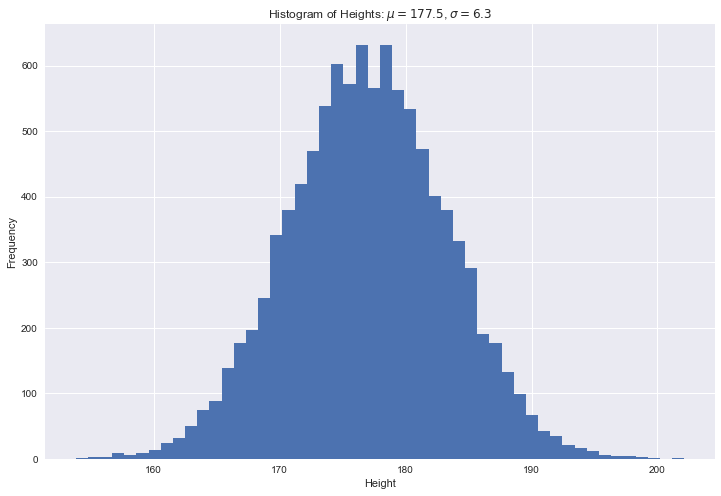

In [33]:
# Simulate Dataset - this will simulate entire population of a dataset - adapted from Ebner 2019.

# Import NumPy Library as np
import numpy as np
import matplotlib.pyplot as plt


# Generate ndarray of "heights" drawn from a sample of 10000 random numbers taken from a normal distribution 
# adapted from https://www.sharpsightlabs.com/blog/numpy-random-normal/

# Define paramters
loc = 177  # refers to mean adult male height in cms
scale = 6.3 # refers to height standard deviation in cms
size = 10000 # to generate 10000 values

# Create an array using defined parameters using random.normal() function
heights = [(np.random.normal(loc, scale , size))]
pop = np.random.normal(loc, scale , size)

#plot histogram using this data
num_bins = 50 #number of bins used for histogram
count, bins, ignored = plt.hist(heights, num_bins, density = False) 

# Plot Parameters
plt.style.use('seaborn') # use seaborn theme
plt.rcParams['figure.figsize'] = (12, 8) # resize the figure
plt.xlabel('Height') # Create Label for x Axis
plt.ylabel('Frequency') # Create Label for y Axis

# Create Title for Plot - adding annotation for mean and standard deviation
plt.title('Histogram of Heights: $\mu=177.5$, $\sigma=6.3$')
plt.show() # show plot

In [34]:
# Calculate STDEV.P of Entire Population

# Calculate the standard deviation of array 'pop' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
# Formula: Square root of; the sum differences between the mean and its data points, squared; 
#                          divided by the number of data points (Adapted from Hall 2020)
stdevp = np.sqrt(np.sum((pop - np.mean(pop))**2)/len(pop))
print('STDEV.P of Population: ',stdevp)

STDEV.P of Population:  6.358180773145914


### 3.5 Simulation 1: Compare STDEV.P and STDEV.S (Small Sample) 

In [35]:
# Create a Ramdom Sample - Simulation 1 - Small Sample 

# Generate sample of 10 values from dataset 'pop' adapted from Geeksforgeeks 2018 
sample1 = np.random.choice(pop,10)
print("\n Array 'sample1' filled with sample of 10 random values from numpy array 'pop' : \n", sample1); # print array 


 Array 'sample1' filled with sample of 10 random values from numpy array 'pop' : 
 [172.80961879 169.25718804 172.57553076 178.01613549 173.68320818
 169.33257001 183.47030627 185.99461756 182.02431075 164.05563453]


In [36]:
# Calculate STDEV.S - Simulation 1 - Small Sample

# Calculate the standard deviation of array 'sample1' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x-1))
# Formula: Square root of; the sum differences between the mean and its data points, squared; 
#                          divided by the number of data points…minus one to correct for bias (Adapted from Hall 2020)
stdevs = np.sqrt(np.sum((sample1 - np.mean(sample1))**2)/(len(sample1)-1))
print('STDEV.S on Small Sample: ', stdevs)

STDEV.S on Small Sample:  7.05695592377712


In [37]:
# Calculate STDEV.P - Simulation 1 - Small Sample

# Use sample1 array data and apply STDEV.P formula
# Calculate the standard deviation of array 'sample1' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
stdevp2 = np.sqrt(np.sum((sample1 - np.mean(sample1))**2)/len(sample1))
print('STDEV.P on Small Sample: ', stdevp2)

STDEV.P on Small Sample:  6.694816219965988


In [38]:
# Compare STDEV.P & STDEV.S - Simulation 1 - Small Sample

print('STDEV.P: ',stdevp2,' STDEV.S: ', stdevs, ' Difference: ', stdevs-stdevp2)


STDEV.P:  6.694816219965988  STDEV.S:  7.05695592377712  Difference:  0.36213970381113203


In [46]:
# Interpret STDEV.P & STDEV.S - Simulation 1 - Small Sample
# null hypothesis (H0) STDEV.S is a better estimate for the standard deviation of a population when performed on a sample. 

# Test if STDEV.S is closer to the STDEV.P of Population:
if abs(stdevs-stdevp) >= abs(stdevp2-stdevp):
	print('Reject H0: STDEV.P is a better estimate for the standard deviation of a population when performed on small sample ') 
else:
	print('Fail to reject H0: STDEV.S is a better estimate for the standard deviation of a population when performed on small sample ')

Reject H0: STDEV.P is a better estimate for the standard deviation of a population when performed on small sample 


### 3.6 Simulation 2: Compare STDEV.P and STDEV.S (Large Sample Size) 

In [40]:
# Create a Ramdom Sample - Simulation 2 - Large Sample 

# Generate ramdom sample of 100 values from dataset 'pop'  adapted from Geeksforgeeks 2018 
sample2 = np.random.choice(pop,100)
print("\n Array 'sample2' filled with sample of 100 random values from numpy array 'pop' : \n", sample2); # print array  


 Array 'sample2' filled with sample of 100 random values from numpy array 'pop' : 
 [173.54283179 196.80180536 170.53752225 172.34714597 168.06765565
 186.16491989 166.36094066 175.62814061 184.72545139 172.43455687
 192.08071616 172.5409498  172.58852628 174.07792574 162.45630172
 174.59877924 181.83156177 188.93313485 173.27379244 177.41989551
 176.19402616 186.87003935 175.08985105 174.75302314 180.99630406
 181.8123771  166.84176457 175.17266683 180.84879572 182.01352128
 179.60908614 183.60800252 170.16798339 178.35961489 178.09238143
 185.45689439 168.4911864  173.71200296 178.06153713 191.49097139
 178.70506541 187.84285634 172.55358008 173.18228954 180.27907824
 172.45286262 176.8723477  181.17459131 196.00135487 173.63753057
 181.63538551 173.08848622 180.10480311 174.51663478 166.28606417
 177.84983565 169.14874633 175.62262126 177.82994309 175.2348512
 166.93022761 170.32718715 174.66523021 173.57965583 189.24113779
 175.17266683 183.68319703 183.06756305 170.37883909 167.8

In [41]:
# Calculate STDEV.S - Simulation 2 - Large Sample

# Calculate the standard deviation of array 'sample2' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x-1))
stdevs2 = np.sqrt(np.sum((sample2 - np.mean(sample2))**2)/(len(sample2)-1))
print('STDEV.S on Large Sample: ', stdevs2)

STDEV.S on Large Sample:  7.2185582855636214


In [42]:
# Calculate STDEV.P - Simulation 2 - Large Sample

# Use sample2 array data and apply STDEV.P formula
# Calculate the standard deviation of array 'sample2' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
stdevp3 = np.sqrt(np.sum((sample2 - np.mean(sample2))**2)/len(sample2))
print('STDEV.P on Large Sample: ', stdevp3)

STDEV.P on Large Sample:  7.182374808157705


In [43]:
# Compare STDEV.P & STDEV.S Simulation 2 - Large Sample

print('STDEV.P: ',stdevp3,' STDEV.S: ', stdevs2, ' Difference: ', stdevs2-stdevp3)

STDEV.P:  7.182374808157705  STDEV.S:  7.2185582855636214  Difference:  0.036183477405916875


In [44]:
# Interpret STDEV.P & STDEV.S - Simulation 2 - Large Sample
# null hypothesis (H0) STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 

# Test if the STDEV.S is closer to the **STDEV.P of Population**:
if abs(stdevs2-stdevp) >= abs(stdevp3-stdevp):
	print('Reject H0: STDEV.P is a better estimate for the standard deviation of a population when performed on a large sample ') 
else:
	print('Fail to reject H0: STDEV.S is a better estimate for the standard deviation of a population when performed on a large sample ')

Reject H0: STDEV.P is a better estimate for the standard deviation of a population when performed on a sample 


### 3.7 Conclusions

* The STDEV.S increased as the sample size increased, therefore I would expect STDEV.S and STDEV.P to converge as sample size increases.
* In simulation 1, Bessel's correction resulted in a larger standard deviations than STDEV.P, the STDEV.S result was a better approximation of the standard deviation of a population when performed on a small sample.
* In simulation 2, Bessel's correction resulted in a smalled standard deviations than STDEV.P, the STDEV.P result was a better approximation of the standard deviation of a population when performed on a larger sample. 
* The results of the two simualtions prove that Bessel’s Correction, STDEV.S doesn’t always give the best estimate. Hall (2020) states that this is "because the potential sample-variances are themselves t-distributed". This may lead to STDEV.S over-estimating the real population standard deviation. 


## Task 4 - Apply K-Means Clustering to Predict Flower Species in the Iris Data Set
***
Using scikit-learn, I apply k-means clustering to Fisher’s famous Iris data set. I explain how my code works and discuss it's accuracy. I go on to outline how my model could be used to make predictions of species of iris.


Clustering is an unsupervisedlearning method that allows us to group set of objects based on similar characteristics. In general, it can help you find meaningful structure among your data, group similar data together and discover underlying patterns.

One of the most common clustering methods is K-means algorithm. The goal of this algorithm isto partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized.

K means works through the following iterative process:

    Pick a value for k (the number of clusters to create)
    Initialize k ‘centroids’ (starting points) in your data
    Create your clusters. Assign each point to the nearest centroid.
    Make your clusters better. Move each centroid to the center of its cluster.
    Repeat steps 3–4 until your centroids converge.

### Import Libraries

In [ ]:
# For interacting with data sets.
import pandas as pd

# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Plotting.
import matplotlib.pyplot as plt

# Import dataset
from sklearn import datasets

from sklearn.preprocessing import StandardScaler


### Load Data

In [ ]:
# Load the iris data set from the library.
iris = datasets.load_iris()

X = iris.data

In [ ]:
X

In [ ]:
# Define your target and predictors.
X = iris.data[:, :2] # Select two features to use to predict cluster; sepal length & sepal width
y = iris.target # This is the target output


In [ ]:
# Visualize the Data
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [ ]:
# Pick a value for k (the number of clusters to create)
km = skcl.KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
y_kmeans = km.fit_predict(X)
y_kmeans

In [ ]:
#Initialize k ‘centroids’ (starting points) in your data
centers = km.cluster_centers_

print(centers)

In [ ]:
#Visualising the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 150, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 150, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 150, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1], s = 150, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlim([4, 8])
plt.ylim([2, 4.5])

In [ ]:

#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

## References:

1. Wikipedia contributors *Square root of 2* [Online] Available at:https://en.wikipedia.org/wiki/Square_root_of_2 [Accessed 6 Oct 2020]
1. Wikipedia contributors *Methods of computing square roots* [Online] Available at:https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method [Accessed 6 Oct 2020]
1. Wikipedia contributors *Newton's method* [Online] Available at:https://en.wikipedia.org/wiki/Newton%27s_method [Accessed 6 Oct 2020]
1. Wikipedia contributors *Irrational number* [Online] Available at:https://en.wikipedia.org/wiki/Irrational_number [Accessed 6 Oct 2020]
1. Wiklin, R (2016) *The Babylonian method for finding square roots by hand* [Online] Available at:https://blogs.sas.com/content/iml/2016/05/16/babylonian-square-roots.html#:~:text=The%20Babylonian%20square%2Droot%20algorithm,Newton%20invented%20his%20general%20procedure. [Accessed 6 Oct 2020]
1. Math.com (2012-2020) *Square roots* [Online] Available at:http://www.math.com/school/subject1/lessons/S1U1L9EX.html#sm1 [Accessed 6 Oct 2020]
1. Python Software Foundation (2020) *Floating Point Arithmetic: Issues and Limitations* [Online] Available at:https://docs.python.org/3/tutorial/floatingpoint.html [Accessed 16 Oct 2020]
1. Cross, D (2019) *How to Calculate a Million Digits of Pi* [Online] Available at:https://medium.com/@cosinekitty/how-to-calculate-a-million-digits-of-pi-d62ce3db8f58 [Accessed 21 Oct 2020]
1. Python Software Foundation (2020) *Floating Point Arithmetic: Issues and Limitations* [Online] Available at:https://docs.python.org/3/tutorial/floatingpoint.html [Accessed 16 Oct 2020]
1. Elkner, J Downey, A.B. & Meyers, C (2010) *Iteration* [Online] Available at:https://www.openbookproject.net/thinkcs/python/english2e/ch06.html [Accessed 7 Dec 2020]

1. Wikipedia contributors *Chi-squared test* [Online] Available at:https://en.wikipedia.org/wiki/Chi-squared_test [Accessed 2 Nov 2020]
1. Brownlee, J (2018) *A Gentle Introduction to the Chi-Squared Test for Machine Learning* [Online] Available at:https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ [Accessed 02 Nov 2020]
1. Hamel, G, J (2018) *Python for Data 25: Chi-Squared Tests* [Online] Available at:https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests [Accessed 02 Nov 2020]
1. Bruns, D (2012-2020) *Excel STDEV.S Function* [Online] Available at:https://exceljet.net/excel-functions/excel-stdev.p-function3 [Accessed 23 Nov 2020]
1. Cheusava, S (2020) *How to calculate standard deviation in Excel* [Online] Available at:https://www.ablebits.com/office-addins-blog/2017/05/31/calculate-standard-deviation-excel/ [Accessed 23 Nov 2020]
1. Ebner, J (2019) *HOW TO USE NUMPY RANDOM NORMAL IN PYTHON* [Online] Available at: https://www.sharpsightlabs.com/blog/numpy-random-normal/  [Accessed 23 Nov 2020]
1. Geeksforgeeks (2018) *Python Numbers | choice() function* [Online] Available at:https://www.geeksforgeeks.org/python-numbers-choice-function/ [Accessed 23 Nov 2020]
1. Hall, B (2020) *The Reasoning Behind Bessel’s Correction: n-1* [Online] Available at:https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9 [Accessed 23 Nov 2020]
1. Wikipedia contributors (2020) *Bessel's correction* [Online] Available at:https://en.wikipedia.org/wiki/Bessel%27s_correction [Accessed 23 Nov 2020]
1. Sanchez, B (2018) *PREDICTING IRIS FLOWER SPECIES WITH K-MEANS CLUSTERING IN PYTHON* [Online] Available at:https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee [Accessed 01 Dec 2020]
1. Tim, I (2016) *Simple K-means clustering on the Iris dataset* [Online] Available at:https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset [Accessed 01 Dec 2020]
1. Dua, D. and Graff, C. (2019) UCI Machine Learning Repository *Iris Data Set* [Online] Available at:https://archive.ics.uci.edu/ml/datasets/Iris [Accessed 01 Dec 2020]



